# Santander Fraud Investigation

1. Importing Libraries
2. EDA & Feature Scaling
3. Create the Train and Test Data
4. Setting up the Model
5. Performance Metrics
6. Techniques to Improve Model Prediction

# Importing Libraries

In [190]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler

# making data frame 
df = pd.read_csv("CC_FRAUD.csv") 
  
df.head(10)

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
5,CIWEVXGWRG.ORG,ROI,386,11,11,0,0,0,1,1,0,1,3,1,-10.096,27,0,49.95,49.95,LEGIT
6,KZOGEIFBAVSI.NET,LM,127,20,20,0,0,1,0,0,0,2,3,1,15.656,9,9,12.95,12.95,LEGIT
7,TMA.COM,AR,649,12,12,0,0,1,1,1,0,1,2,0,-38.320,16,0,10.36,10.36,LEGIT
8,VUHZRNB.COM,BO,308,13,13,0,0,0,1,1,0,2,3,0,33.328,10,0,38.85,38.85,LEGIT
9,EAYROLLTBU.COM,PO,614,6,6,0,0,1,0,0,0,1,2,0,-43.496,8,0,10.36,10.36,LEGIT


# EDA & Feature Engineering

In [191]:
df.shape

(94682, 20)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94682 entries, 0 to 94681
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DOMAIN         94682 non-null  object 
 1   STATE          94682 non-null  object 
 2   ZIPCODE        94682 non-null  int64  
 3   TIME1          94682 non-null  int64  
 4   TIME2          94682 non-null  int64  
 5   VIS1           94682 non-null  int64  
 6   VIS2           94682 non-null  int64  
 7   XRN1           94682 non-null  int64  
 8   XRN2           94682 non-null  int64  
 9   XRN3           94682 non-null  int64  
 10  XRN4           94682 non-null  int64  
 11  XRN5           94682 non-null  int64  
 12  VAR1           94682 non-null  int64  
 13  VAR2           94682 non-null  int64  
 14  VAR3           94682 non-null  float64
 15  VAR4           94682 non-null  int64  
 16  VAR5           94682 non-null  int64  
 17  TRN_AMT        94682 non-null  float64
 18  TOTAL_

Fraudulent transactions: 2.21%

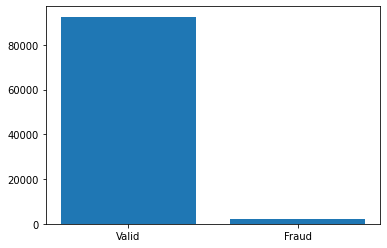

In [193]:
#Produce a graph showing the unbalanced data for the target variable
plt.bar(['Valid','Fraud'],list(df['TRN_TYPE'].value_counts()))
print("Fraudulent transactions: ", end='')
frauds= df['TRN_TYPE'].value_counts()[1]/sum(df['TRN_TYPE'].value_counts())
print(round(frauds*100,2), end='%')
plt.show()

In [194]:
# dropping columns which are not necessary for prediction
to_drop = ['DOMAIN','STATE','ZIPCODE', 'TRN_AMT']
df.drop(to_drop, inplace = True, axis = 1)

In [195]:
#Convert target variable labels to numerical data
df["TRN_TYPE"].replace({"LEGIT": 0, "FRAUD": 1}, inplace=True)

In [196]:
#Obtaining numerical information on the target variable in the dataset
Total_transactions = len(df)
normal = len(df[df.TRN_TYPE == 0])
fraudulent = len(df[df.TRN_TYPE == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 94682
Number of Normal Transactions are 92588
Number of fraudulent Transactions are 2094
Percentage of fraud Transactions is 2.26


In [197]:
#Performing feature scaling
sc = StandardScaler()

TIME1 = df['TIME1'].values
df['TIME1'] = sc.fit_transform(TIME1.reshape(-1, 1))

TIME2 = df['TIME2'].values
df['TIME2'] = sc.fit_transform(TIME2.reshape(-1, 1))

XRN5 = df['XRN5'].values
df['XRN5'] = sc.fit_transform(XRN5.reshape(-1, 1))

VAR1 = df['VAR1'].values
df['VAR1'] = sc.fit_transform(VAR1.reshape(-1, 1))

VAR3 = df['VAR3'].values
df['VAR3'] = sc.fit_transform(VAR3.reshape(-1, 1))

VAR4 = df['VAR4'].values
df['VAR4'] = sc.fit_transform(VAR4.reshape(-1, 1))

VAR5 = df['VAR5'].values
df['VAR5'] = sc.fit_transform(VAR5.reshape(-1, 1))

TOTAL_TRN_AMT = df['TOTAL_TRN_AMT'].values
df['TOTAL_TRN_AMT'] = sc.fit_transform(TOTAL_TRN_AMT.reshape(-1, 1))

# Create the Train and Test Data

In [198]:
#Creating train and test sets (99% for training and the top 1% for testing)
train = df.nsmallest(93735, ['TOTAL_TRN_AMT'])
test = df.nlargest(947, ['TOTAL_TRN_AMT'])

In [199]:
# Define resampling method and split into train and test
X_train = train.iloc[:,:15]
X_test = test.iloc[:,:15]
y_train = train['TRN_TYPE']
y_test = test['TRN_TYPE']

In [200]:
#Get information on the target variable in the test set
y_test.value_counts()

0    927
1     20
Name: TRN_TYPE, dtype: int64

# Setting up the Model

In [201]:
# Define the model as the random forest
model = RandomForestClassifier(random_state=5, n_estimators=20)
#Decision Tree
#model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
#KNN
#n = 5
#model = KNeighborsClassifier(n_neighbors = n)
#Logistic Regression
#model = LogisticRegression()
#SVM 
#svm = SVC()
#Random Forest Tree 2
#model = RandomForestClassifier(max_depth = 4)
#XGBoost
#model = XGBClassifier(max_depth = 4)

# Fit the model to our training set
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=5)

In [202]:
# Obtain predictions from the test data 
predicted = model.predict(X_test)

# Performance Metrics

In [203]:
#Find out accuracy score
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted):0.3f}')

Accuracy Score:
0.978


In [204]:
# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.42575512405609495

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       927
           1       0.33      0.05      0.09        20

    accuracy                           0.98       947
   macro avg       0.66      0.52      0.54       947
weighted avg       0.97      0.98      0.97       947


Confusion Matrix:
[[925   2]
 [ 19   1]]


ROC Score:

The areas under ROC curves are used to compare the usefulness of tests.
0.5 suggests no discrimination
0.7 to 0.8 is considered acceptable 
0.8 to 0.9 is considered excellent

This curve plots two parameters: True Positive Rate & False Positive Rate.
TPR = TP/TP+FN (Recall) and FPR = FP/FP+TN

Precision:

What proportion of positive identifications was actually correct? 
TP/TP+FP

Recall:

What proportion of actual positives was identified correctly? 
TP/TP+FN

f1-score:

The F1 score can be interpreted as a harmonic mean of the precision and recall
F1 score reaches its best value at 1 and worst score at 0

Confusion Matrix:

.................................................C1:Predicted No........C2:Predicted Yes           
R1.Actual No
.
R2.Actual Yes

# Techniques to Improve Model Prediction

# Upsampling (SMOTE)

In [205]:
#Use SMOTE (Synthetic Minority Oversampling Technique) for upsampling the train data
#Upsampling techniques like this will increase the amount of training data by balancing the classes but could in turn 
#lead to overfitting
sm = SMOTE(random_state = 42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [206]:
model.fit(X_train_oversampled, y_train_oversampled)

RandomForestClassifier(n_estimators=20, random_state=5)

In [207]:
# Obtain predictions from the test data 
predicted = model.predict(X_test)

In [208]:
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted):0.3f}')

Accuracy Score:
0.979


In [209]:
# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.42575512405609495

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       927
           1       0.50      0.05      0.09        20

    accuracy                           0.98       947
   macro avg       0.74      0.52      0.54       947
weighted avg       0.97      0.98      0.97       947


Confusion Matrix:
[[926   1]
 [ 19   1]]


# Gridsearch Cross Validation

In [ ]:
param_grid = {'n_estimators': [1, 10, 15, 20, 25, 30],
              'max_features': ['auto', 'log2'], 
              'max_depth': [3, 4, 5, 8, 10, 12, 15],
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

In [ ]:
#Use the best parameters from gridsearch cross validation
model = RandomForestClassifier(random_state=5, criterion='entropy', max_depth=15, max_features='auto', n_estimators=1)
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [154]:
#Find out accuracy score
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted):0.3f}')

Accuracy Score:
0.974


In [155]:
# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.42575512405609495

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       927
           1       0.00      0.00      0.00        20

    accuracy                           0.97       947
   macro avg       0.49      0.50      0.49       947
weighted avg       0.96      0.97      0.97       947


Confusion Matrix:
[[922   5]
 [ 20   0]]


# Near Miss 

In [210]:
#An under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority 
#class equal to the minority class. This leads to a loss of valuable information

from imblearn.under_sampling import NearMiss

nm = NearMiss()

In [211]:
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

In [212]:
model.fit(X_train_nm, y_train_nm)

RandomForestClassifier(n_estimators=20, random_state=5)

In [213]:
# Obtain predictions from the test data 
predicted = model.predict(X_test)

In [214]:
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted):0.3f}')

Accuracy Score:
0.036


In [215]:
# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.42575512405609495

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.03       927
           1       0.02      1.00      0.04        20

    accuracy                           0.04       947
   macro avg       0.51      0.51      0.04       947
weighted avg       0.98      0.04      0.03       947


Confusion Matrix:
[[ 14 913]
 [  0  20]]
